# Capstone Project - The Battle of Neighborhoods (Week 2)

Nowadays we all know that basic necessity in this time of pandemic. Most of the people only get out of their house to buy foods and grocery to the nearest supermarket or grocery store, and due to high demand of basic necessity, most of stores are full of customers and most of people consume a lot of their time queue outside the store. It may be good reason that a stakeholder may get interested to open a business place like Supermarket or Grocery Store in Denver City, Colorado. 

This report goal is to find a safe and secure location to start a business place in Denver City, Colorado in this time of pandemic. The first thing to do choose an area with least crime rate near the area by analyzing crime data. Next is to get a shortlisting of neighborhood where same like business is not common on the area.

In this report, we will use data science tools to analyze data and select the safest place to open a commercial establishment and explore its neighborhoods and get the 10 most common venues in each neighborhood where same like business is not common on the area.

## Data

City to be analyzed in this project: **Denver City, Colorado**

#### **DATA 1** 

**Crime Data in Denver City** – data set from [Seattle City’s Open Data Portal](https://www.denvergov.org/) which is free to download and use. This data set is needed in order to locate and analyze which specific area have the least crime rate and the data is saved in terms of what kind of crime committed as well as the location indicated in longitude and latitude.

Dataset source: https://www.denvergov.org/media/gis/DataCatalog/census_neighborhood_demographics_2010/csv/census_neighborhood_demographics_2010.csv

The dataset containing the crimes committed in Denver from 2015 to 2020. The dataset have almost ~500,000 rows and 19 columns. Because of that, we will only process dataset from 2019 to 2020, as we all know that we are getting the dataset since pandemic starts.

These are needed columns to answer the business problem:

 - **FIRST_OCCURRENCE_DATE** - contains the occurance date of crime
 - **OFFENSE_TYPE_ID** - contains what type crime committed
 - **GEO_LON** - longitude of the area where the crime committed
 - **GEO_LAT** - latitude of the area where the crime committed
 - **NEIGHBORHOOD_ID** - name of the neighborhood where the crime committed

#### **DATA 2**

**List of Neighborhood in Denver City** – data set also comes from [Seattle City’s Open Data Portal](https://www.denvergov.org/). In this data set contains the official list of neighborhoods in Denver that is will be used to map the existing data where each neighborhood can be assigned with its respective borough.

Dataset source: https://www.denvergov.org/media/gis/DataCatalog/crime/csv/crime.csv

The dataset have almost 78 rows and 19 columns. But only **NBRHD_NAME** column is needed in this data set, which contain 78 borough in the Denver city.

#### **DATA 3**

**Neighborhood's coordinates (Longitude and Latitude)** – After we get the list of neighborhoods in Denver City, we will get the coordinate of each neighborhood in Denver. To fetch data, we will need to use Geocoder, then explore the neighborhood by plotting it on maps using Folium and perform exploratory data analysis.

#### **DATA 4**

**Shortlisting of commercial establishment along the neighborhood of Denver with coordinates** - This data will be fetched using Four Square API to explore the neighborhood venues and to apply machine learning algorithm to cluster the neighborhoods and present the findings by plotting it on maps using Folium.

***

### Crime Data in Denver City

The data set from [Seattle City’s Open Data Portal](https://www.denvergov.org/) containing crimes from year 2015 to 2020.

Needed properties of Data Set

 - FIRST_OCCURRENCE_DATE
 - OFFENSE_TYPE_ID
 - GEO_LON
 - GEO_LAT
 - NEIGHBORHOOD_ID

Data set source: https://www.denvergov.org/

### Importing needed Libries

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### DATA 1 - (Crimed Data Set in Denver City)
### Downloading Data

In [ ]:
#!wget -q -O 'crime_denver.csv' https://www.denvergov.org/media/gis/DataCatalog/crime/csv/crime.csv
#print('Data downloaded!')

### Reading Data
Because the data is almost ~ 500,000 rows, we will process this by getting only data from 2019 to 2020, and ignore the rows which related to traffic related incidents.

In [2]:
denver_crime_df = pd.read_csv("crime_denver.csv")
print("Done!")

Done!


In [3]:
borough_df = pd.read_csv("Borough.csv")
print("Done!")

Done!


In [4]:
denver_crime_df.shape

(536821, 19)

In [5]:
bor = list(borough_df["BOROUGH"])

In [6]:
denver_crime_df["BOROUGH"] = bor

In [7]:
denver_crime_df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,BOROUGH
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5.0,512.0,stapleton,1,0,Northeast
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1.0,122.0,west-colfax,0,1,West
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6.0,612.0,union-station,1,0,Central
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1.0,122.0,west-colfax,1,0,West
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5.0,521.0,montbello,1,0,Northeast


### Cleaning the Data set

There is two kind of crime in this data set, normal crime and traffic crime. We will just ignore the rows which related to traffic related incidents.

In [8]:
denver_crime_df = denver_crime_df = denver_crime_df[denver_crime_df.IS_CRIME != 0]

Select the needed columns in the dataframe.

In [9]:
denver_crime_df = denver_crime_df[["BOROUGH",
                                "NEIGHBORHOOD_ID",
                                "OFFENSE_TYPE_ID",
                                "FIRST_OCCURRENCE_DATE",
                                "GEO_LAT",
                                "GEO_LON"]]

Convert the column **"FIRST_OCCURRENCE_DATE"** from **object** to **datetime64** format. This may take a while..

In [10]:
denver_crime_df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(denver_crime_df['FIRST_OCCURRENCE_DATE'])

In this project, we will just need the dataset from January 2020 to December 2020.

In [11]:
start_date = '2020-01-01 00:00:00'
end_date = '2020-12-31 00:00:00'

mask = (denver_crime_df['FIRST_OCCURRENCE_DATE'] > start_date) & (denver_crime_df['FIRST_OCCURRENCE_DATE'] <= end_date)
denver_crime_df = denver_crime_df.loc[mask]
denver_crime_df = denver_crime_df.reset_index(drop = True)

Rename the column names

In [12]:
denver_crime_df.rename({'NEIGHBORHOOD_ID': 'Neighborhood', 'OFFENSE_TYPE_ID': 'Crime', 'FIRST_OCCURRENCE_DATE' : 'Date', 'GEO_LAT' : 'Latitude', 'GEO_LON' : 'Longitude', 'BOROUGH' : 'Borough'}, axis=1, inplace=True)

In [13]:
denver_crime_df.head()

,Borough,Neighborhood,Crime,Date,Latitude,Longitude
0,North,five-points,criminal-trespassing,2020-02-29 20:15:00,39.754698,-104.988366
1,South,college-view-south-platte,theft-items-from-vehicle,2020-01-13 23:00:00,39.679879,-105.010399
2,North,five-points,weapon-by-prev-offender-powpo,2020-01-20 02:02:00,39.752955,-104.988962
3,Northeast,stapleton,theft-shoplift,2020-01-21 15:43:00,39.784132,-104.891880
4,Northeast,gateway-green-valley-ranch,aggravated-assault,2020-02-19 20:06:00,39.795773,-104.803388


In 2020, in the wake of the Black Lives Matter movement and to condemn the legacy of the former Denver mayor Benjamin F. Stapleton, a member of the Ku Klux Klan, the community formally changed the name of the neighborhood from **'Stapleton'** to **'Central Park'**. 

So for now for data consistency we will replace all **"central-park"** values to **"stapleton"**

In [14]:
denver_crime_df = denver_crime_df.replace(to_replace ="central-park", value ="stapleton") 

Remove rows that does not have a value in incomplete values or NaN values.

In [15]:
denver_crime_df.dropna(subset = ["Latitude"], inplace=True)
denver_crime_df.dropna(subset = ["Longitude"], inplace=True)
denver_crime_df.dropna(subset = ["Borough"], inplace=True)
denver_crime_df.dropna(subset = ["Crime"], inplace=True)
denver_crime_df.dropna(subset = ["Neighborhood"], inplace=True)
denver_crime_df.dropna(subset = ["Date"], inplace=True)
denver_crime_df = denver_crime_df.reset_index(drop = True)

In [16]:
denver_crime_df.head()

,Borough,Neighborhood,Crime,Date,Latitude,Longitude
0,North,five-points,criminal-trespassing,2020-02-29 20:15:00,39.754698,-104.988366
1,South,college-view-south-platte,theft-items-from-vehicle,2020-01-13 23:00:00,39.679879,-105.010399
2,North,five-points,weapon-by-prev-offender-powpo,2020-01-20 02:02:00,39.752955,-104.988962
3,Northeast,stapleton,theft-shoplift,2020-01-21 15:43:00,39.784132,-104.891880
4,Northeast,gateway-green-valley-ranch,aggravated-assault,2020-02-19 20:06:00,39.795773,-104.803388


In [17]:
denver_crime_df.shape

(65203, 6)

#### Total Number of crimes in from each Borough in Denver City

In [26]:
denver_crime_df["Borough"].value_counts().to_frame()

,Borough
Central,17689
Northeast,9367
North,7868
West,7674
East,6656
Northwest,5225
South,4503
Southeast,3719
Southwest,2502


#### Total Number of crimes in different Neighborhood in Denver City

In [27]:
denver_crime_df["Neighborhood"].value_counts().to_frame().head(10)

,Neighborhood
five-points,3796
capitol-hill,2870
stapleton,2827
cbd,2286
montbello,2153
union-station,1886
gateway-green-valley-ranch,1820
civic-center,1696
lincoln-park,1545
east-colfax,1537


#### Number of Crimes by Borough (Catergorized by type of crime)

In [29]:
denver_crime_pv1 = pd.pivot_table(denver_crime_df, values=['Date'], index=['Borough'], columns=['Crime'], aggfunc=len, fill_value=0, margins=True)

denver_crime_pv1.reset_index(inplace = True)
denver_crime_pv1.columns = denver_crime_pv1.columns.map(''.join)
denver_crime_pv1.rename(columns={'DateAll':'Total'}, inplace=True)

denver_crime_pv1

,Borough,Dateaccessory-conspiracy-to-crime,Dateagg-aslt-police-weapon,Dateaggravated-assault,Dateaggravated-assault-dv,Datealtering-vin-number,Dateanimal-cruelty-to,Dateanimal-poss-of-dangerous,Datearson-business,Datearson-other,Datearson-public-building,Datearson-residence,Datearson-vehicle,Dateassault-dv,Dateassault-police-simple,Dateassault-simple,Datebomb-threat,Datebribery,Dateburg-auto-theft-busn-no-force,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Dateweapon-c

#### Number of Crimes by different Neighborhood (Catergorized by type of crime)

In [30]:
denver_crime_pv2 = pd.pivot_table(denver_crime_df, values=['Date'], index=['Neighborhood'], columns=['Crime'], aggfunc=len, fill_value=0, margins=True)

denver_crime_pv2.reset_index(inplace = True)
denver_crime_pv2.columns = denver_crime_pv2.columns.map(''.join)
denver_crime_pv2.rename(columns={'DateAll':'Total'}, inplace=True)

denver_crime_pv2

,Neighborhood,Dateaccessory-conspiracy-to-crime,Dateagg-aslt-police-weapon,Dateaggravated-assault,Dateaggravated-assault-dv,Datealtering-vin-number,Dateanimal-cruelty-to,Dateanimal-poss-of-dangerous,Datearson-business,Datearson-other,Datearson-public-building,Datearson-residence,Datearson-vehicle,Dateassault-dv,Dateassault-police-simple,Dateassault-simple,Datebomb-threat,Datebribery,Dateburg-auto-theft-busn-no-force,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Datewea

#### Describe some Statistical details of a dataframe of numeric values.

Statistical detail crime by Borough:

In [31]:
denver_crime_pv1.describe()

,Dateaccessory-conspiracy-to-crime,Dateagg-aslt-police-weapon,Dateaggravated-assault,Dateaggravated-assault-dv,Datealtering-vin-number,Dateanimal-cruelty-to,Dateanimal-poss-of-dangerous,Datearson-business,Datearson-other,Datearson-public-building,Datearson-residence,Datearson-vehicle,Dateassault-dv,Dateassault-police-simple,Dateassault-simple,Datebomb-threat,Datebribery,Dateburg-auto-theft-busn-no-force,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Dateweapon-carrying-

Statistical detail of crime by Neighborhood:

In [32]:
denver_crime_pv2.describe()

,Dateaccessory-conspiracy-to-crime,Dateagg-aslt-police-weapon,Dateaggravated-assault,Dateaggravated-assault-dv,Datealtering-vin-number,Dateanimal-cruelty-to,Dateanimal-poss-of-dangerous,Datearson-business,Datearson-other,Datearson-public-building,Datearson-residence,Datearson-vehicle,Dateassault-dv,Dateassault-police-simple,Dateassault-simple,Datebomb-threat,Datebribery,Dateburg-auto-theft-busn-no-force,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Dateweapon-carrying-

### Explore data using Visualization

Five Neighborhoods with highest crime

In [34]:
denver_crime_pv2.sort_values(['Total'], ascending = False, axis = 0, inplace = True )
den_top5_neigh = denver_crime_pv2.iloc[1:6]
den_top5_neigh

,Neighborhood,Dateaccessory-conspiracy-to-crime,Dateagg-aslt-police-weapon,Dateaggravated-assault,Dateaggravated-assault-dv,Datealtering-vin-number,Dateanimal-cruelty-to,Dateanimal-poss-of-dangerous,Datearson-business,Datearson-other,Datearson-public-building,Datearson-residence,Datearson-vehicle,Dateassault-dv,Dateassault-police-simple,Dateassault-simple,Datebomb-threat,Datebribery,Dateburg-auto-theft-busn-no-force,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Datewea

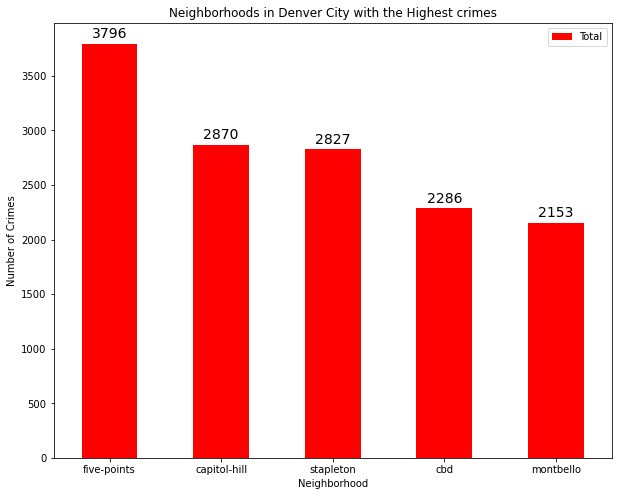

In [35]:
per_neigh = den_top5_neigh[['Neighborhood','Total']]

per_neigh.set_index('Neighborhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 8), rot=0, color = 'r')

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('Neighborhoods in Denver City with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

Five Neighborhoods with lowest crime

In [36]:
den_low5_neigh = denver_crime_pv2.tail(5)
den_low5_neigh

,Neighborhood,Dateaccessory-conspiracy-to-crime,Dateagg-aslt-police-weapon,Dateaggravated-assault,Dateaggravated-assault-dv,Datealtering-vin-number,Dateanimal-cruelty-to,Dateanimal-poss-of-dangerous,Datearson-business,Datearson-other,Datearson-public-building,Datearson-residence,Datearson-vehicle,Dateassault-dv,Dateassault-police-simple,Dateassault-simple,Datebomb-threat,Datebribery,Dateburg-auto-theft-busn-no-force,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Datewea

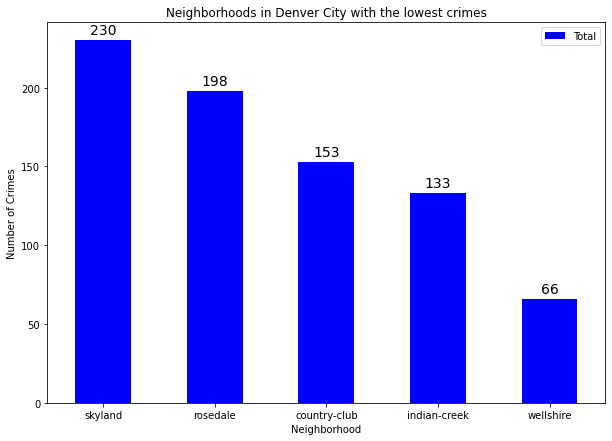

In [37]:
per_neigh = den_low5_neigh[['Neighborhood','Total']]

per_neigh.set_index('Neighborhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 7), rot=0, color = 'b')

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('Neighborhoods in Denver City with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

#### Borough in Denver with highest crime

In [39]:
denver_crime_pv1 = pd.pivot_table(denver_crime_df,
                               values=['Date'],
                               index=['Borough'],
                               columns=['Crime'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)

In [41]:
denver_crime_pv1.reset_index(inplace = True)
denver_crime_pv1.columns = denver_crime_pv1.columns.map(''.join)
denver_crime_pv1.rename(columns={'Dateaccessory-conspiracy-to-crime' : 'Accessory to Crime',
                              'Dateagg-aslt-police-weapon' : 'Aggravated Assault at Police',
                              'Dateaggravated-assault' : 'Aggravated Assault',
                              'Dateaggravated-assault-dv' : 'Domestic Violence - Aggravated Assault',
                              'Datealtering-vin-number' : 'Counterfeiting/Forgery',
                              'Dateanimal-cruelty-to' : 'Animal Cruelty',
                              'Dateanimal-poss-of-dangerous' : 'Illegal Possesion of Dangerous Animal',
                              'Datearson-business' : 'Arson - Business',
                              'Datearson-other' : 'Arson - Others',
                              'Datearson-public-building' : 'Arson - Public Building',
                              'Datearson-residence' : 'Arson - Residence',
                              'Datearson-vehicle' : 'Arson - Vehicle',
                              'Dateassault-dv' : 'Domestice Violence - Assault',
                              'Dateassault-police-simple' : 'Assault at Police',
                              'Dateassault-simple' : 'Assault',
                              'Datebomb-threat' : 'Bomb Threat',
                              'Datebribery' : 'Bribery',
                              'Dateburg-auto-theft-busn-no-force' : 'Burglary',
                              'Dateburg-auto-theft-busn-w-forcey' : 'Robbery'}, inplace=True)
denver_crime_pv1 = denver_crime_pv1.head(4)
denver_crime_pv1

,index,Borough,Accessory to Crime,Aggravated Assault at Police,Aggravated Assault,Domestic Violence - Aggravated Assault,Counterfeiting/Forgery,Animal Cruelty,Illegal Possesion of Dangerous Animal,Arson - Business,Arson - Others,Arson - Public Building,Arson - Residence,Arson - Vehicle,Domestice Violence - Assault,Assault at Police,Assault,Bomb Threat,Bribery,Burglary,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Dateweapon-carrying-prohibited,Dateweapon-fire-into-occ-

In [42]:
del denver_crime_pv1["index"]

In [45]:
denver_crime_pv1 = denver_crime_pv1.rename({'DateAll': 'Total'}, axis=1)
denver_crime_pv1

,Borough,Accessory to Crime,Aggravated Assault at Police,Aggravated Assault,Domestic Violence - Aggravated Assault,Counterfeiting/Forgery,Animal Cruelty,Illegal Possesion of Dangerous Animal,Arson - Business,Arson - Others,Arson - Public Building,Arson - Residence,Arson - Vehicle,Domestice Violence - Assault,Assault at Police,Assault,Bomb Threat,Bribery,Burglary,Dateburg-auto-theft-busn-w-force,Dateburg-auto-theft-resd-no-force,Dateburg-auto-theft-resd-w-force,Dateburglary-business-by-force,Dateburglary-business-no-force,Dateburglary-poss-of-tools,Dateburglary-residence-by-force,Dateburglary-residence-no-force,Dateburglary-safe,Dateburglary-vending-machine,Datecontraband-into-prison,Datecontraband-possession,Datecriminal-mischief-graffiti,Datecriminal-mischief-mtr-veh,Datecriminal-mischief-other,Datecriminal-trespassing,Datecurfew,Datedisarming-a-peace-officer,Datedisturbing-the-peace,Datedrug-barbiturate-possess,Datedrug-barbiturate-sell,Datedrug-cocaine-possess,Datedrug-cocaine-sell,Datedrug-forgery-to-obtain,Datedrug-fraud-to-obtain,Datedrug-hallucinogen-mfr,Datedrug-hallucinogen-possess,Datedrug-hallucinogen-sell,Datedrug-heroin-possess,Datedrug-heroin-sell,Datedrug-make-sell-other-drug,Datedrug-marijuana-cultivation,Datedrug-marijuana-possess,Datedrug-marijuana-sell,Datedrug-methampetamine-possess,Datedrug-methampetamine-sell,Datedrug-methamphetamine-mfr,Datedrug-opium-or-deriv-possess,Datedrug-opium-or-deriv-sell,Datedrug-pcs-other-drug,Datedrug-poss-paraphernalia,Datedrug-synth-narcotic-possess,Datedrug-synth-narcotic-sell,Dateescape,Dateexplosive-incendiary-dev-pos,Dateexplosive-incendiary-dev-use,Dateextortion,Datefalse-imprisonment,Datefireworks-possession,Dateforgery-checks,Dateforgery-counterfeit-of-obj,Dateforgery-other,Dateforgery-poss-of-forged-ftd,Dateforgery-poss-of-forged-inst,Dateforgery-posses-forge-device,Datefraud-by-telephone,Datefraud-by-use-of-computer,Datefraud-criminal-impersonation,Datefraud-identity-theft,Datefraud-nsf-closed-account,Dateharassment,Dateharassment-dv,Dateharassment-sexual-in-nature,Dateharassment-stalking-dv,Datehomicide-family,Datehomicide-other,Datehomicide-police-by-gun,Dateillegal-dumping,Dateimpersonation-of-police,Dateindecent-exposure,Dateintimidation-of-a-witness,Datekidnap-adult-victim,Datekidnap-dv,Dateliquor-possession,Dateliquor-sell,Datelittering,Datemenacing-felony-w-weap,Dateobscene-material-possess,Dateobstructing-govt-operation,Dateother-enviornment-animal-viol,Dateparole-violation,Datepawn-broker-viol,Datepolice-disobey-lawful-order,Datepolice-false-information,Datepolice-interference,Datepolice-making-a-false-rpt,Datepolice-obstruct-investigation,Datepolice-resisting-arrest,Dateprobation-violation,Dateproperty-crimes-other,Dateprostitution-engaging-in,Datepublic-fighting,Datepublic-order-crimes-other,Datepublic-peace-other,Datereckless-endangerment,Dateriot,Daterobbery-bank,Daterobbery-business,Daterobbery-car-jacking,Daterobbery-purse-snatch-w-force,Daterobbery-residence,Daterobbery-street,Datesex-off-fail-to-register,Datesex-off-registration-viol,Datestolen-property-buy-sell-rec,Datetheft-bicycle,Datetheft-confidence-game,Datetheft-embezzle,Datetheft-fail-return-rent-veh,Datetheft-from-bldg,Datetheft-from-mails,Datetheft-gas-drive-off,Datetheft-items-from-vehicle,Datetheft-of-motor-vehicle,Datetheft-of-rental-property,Datetheft-of-services,Datetheft-other,Datetheft-parts-from-vehicle,Datetheft-pick-pocket,Datetheft-purse-snatch-no-force,Datetheft-shoplift,Datetheft-stln-veh-const-eqpt,Datetheft-stln-vehicle-trailer,Datetheft-unauth-use-of-ftd,Datethreats-to-injure,Datetraf-habitual-offender,Datetraf-other,Datetraf-vehicular-assault,Datetraf-vehicular-homicide,Datevehicular-eluding,Datevehicular-eluding-no-chase,Dateviolation-of-court-order,Dateviolation-of-custody-order,Dateviolation-of-restraining-order,Dateweapon-altering-serial-number,Dateweapon-by-prev-offender-powpo,Dateweapon-carrying-concealed,Dateweapon-carrying-prohibited,Dateweapon-fire-into-occ-bldg,D

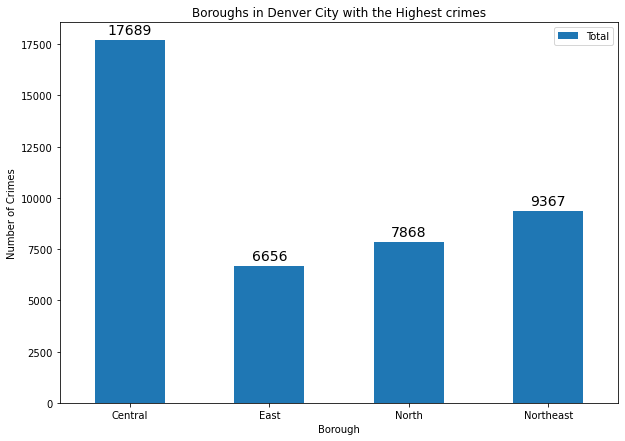

In [46]:
per_borough = denver_crime_pv1[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 7), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Boroughs in Denver City with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### DATA 2 - (List of Neighborhood in Denver City)
### Downloading Data

In [ ]:
#!wget -q -O 'neigh_denver.csv' https://www.denvergov.org/media/gis/DataCatalog/census_neighborhood_demographics_2010/csv/census_neighborhood_demographics_2010.csv
#print('Data downloaded!')

### Reading Data

In [68]:
denver_neigh_df = pd.read_csv("neigh_denver.csv")
print("Done!")

Done!


In [69]:
denver_neigh_df.shape

(78, 4)

### Cleaning the Data set

Rename the column **"NBRHD_NAME"** to **"Neighborhood"**

In [70]:
denver_neigh_df = denver_neigh_df.rename({'NBRHD_NAME': 'Neighborhood'}, axis=1)

Sort the values in **"Neighborhood"** alphabetically.

In [71]:
denver_neigh_df = denver_neigh_df.sort_values(["Neighborhood"]).reset_index(drop = True)

### DATA 3 - Neighborhood's coordinates
### (Longitude and Latitude)

In [72]:
denver_neigh_df.head(10)

,Neighborhood,Borough,Latitude,Longitude
0,Athmar Park,West,39.703990,-105.009790
1,Auraria,Northwest,39.745270,-105.009120
2,Baker,Central,39.671950,-104.911220
3,Barnum,West,39.714800,-104.996400
4,Barnum West,West,39.718200,-105.032500
5,Bear Valley,Southwest,39.662778,-105.060833
6,Belcaro,East,39.703890,-104.950000
7,Berkeley,Northwest,39.776670,-105.038060
8,CBD,Central,39.739200,-104.990300
9,Capitol Hill,Central,39.733700,-104.979900


Get geographical coordinates of Denver city

In [73]:
address = 'Denver City, Colorado'

geolocator = Nominatim(user_agent="den_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
loca = location.address
print('The geograpical coordinate of {} are {}, {}.'.format(loca, latitude, longitude))

The geograpical coordinate of Denver, Denver County, Colorado, United States are 39.7392364, -104.9848623.


Visualization of Denver Map with plotted Borough and it's Neighbors

In [74]:
map_denver = folium.Map(location=[latitude, longitude], zoom_start=11)

for lati, long, borough, neighborhood in zip(denver_neigh_df['Latitude'], denver_neigh_df['Longitude'], denver_neigh_df['Borough'] ,denver_neigh_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lati, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_denver)  
    
map_denver

### DATA 4 - Shortlisting of commercial establishment along the neighborhood of Denver with coordinates

Define Foursquare Credentials

In [75]:
CLIENT_ID = 'QGVYAFUAXVALWF12NRH2ZYJ1LPHZVRFIVNVZBHZKQKJFV1RQ' 
CLIENT_SECRET = 'XVJBH5OUJVTGEKDCTHH1WM2UNHWV4D3JAGXLWFXKPXZP3OEE' 
VERSION = '20180605'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QGVYAFUAXVALWF12NRH2ZYJ1LPHZVRFIVNVZBHZKQKJFV1RQ
CLIENT_SECRET:XVJBH5OUJVTGEKDCTHH1WM2UNHWV4D3JAGXLWFXKPXZP3OEE


Top 10 venues around the neighborhood

In [76]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

Get nearby venues around the neighborhood

In [77]:
denver_venues = getNearbyVenues(names=denver_neigh_df['Neighborhood'], latitudes=denver_neigh_df['Latitude'], longitudes=denver_neigh_df['Longitude'])

Athmar Park
Auraria
Baker
Barnum
Barnum West
Bear Valley
Belcaro
Berkeley
CBD
Capitol Hill
Chaffee Park
Cheesman Park
Cherry Creek
City Park
City Park West
Civic Center
Clayton
Cole
College View / South Platte
Congress Park
Cory - Merrill
Country Club
DIA
East Colfax
Elyria Swansea
Five Points
Fort Logan
Gateway / Green Valley Ranch
Globeville
Goldsmith
Hale
Hampden
Hampden South
Harvey Park
Harvey Park South
Highland
Hilltop
Indian Creek
Jefferson Park
Kennedy
Lincoln Park
Lowry Field
Mar Lee
Marston
Montbello
Montclair
North Capitol Hill
North Park Hill
Northeast Park Hill
Overland
Platt Park
Regis
Rosedale
Ruby Hill
Skyland
Sloan Lake
South Park Hill
Southmoor Park
Speer
Stapleton
Sun Valley
Sunnyside
Union Station
University
University Hills
University Park
Valverde
Villa Park
Virginia Village
Washington Park
Washington Park West
Washington Virginia Vale
Wellshire
West Colfax
West Highland
Westwood
Whittier
Windsor


In [78]:
denver_venues.head(15)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Athmar Park,39.70399,-105.00979,Jeff's Hot Tub Getaway,Vacation Rental
1,Athmar Park,39.70399,-105.00979,Pineview Custom Engraving,Gift Shop
2,Athmar Park,39.70399,-105.00979,A Room With A View Paperhanging,Construction & Landscaping
3,Athmar Park,39.70399,-105.00979,Lisa Krueger,Art Gallery
4,Athmar Park,39.70399,-105.00979,athmar park,Park
5,Auraria,39.74527,-105.00912,Tivoli Brewing Company,Brewery
6,Auraria,39.74527,-105.00912,Ball Arena,Basketball Stadium
7,Auraria,39.74527,-105.00912,Alfresco Greens,Salad Place
8,Auraria,39.74527,-105.00912,Biker Jim's @ Auraria Campus,Hot Dog Joint
9,Auraria,39.74527,-105.00912,Dazbog,Coffee Shop


In [87]:
denver_venues.shape

(1136, 5)

Total number of Venues per Neighborhood

In [88]:
denver_venues.groupby('Neighborhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighborhood,
Athmar Park,5
Auraria,31
Baker,3
Barnum,15
Barnum West,9
Bear Valley,1
Belcaro,4
Berkeley,18
CBD,38


In [89]:
print('There are {} uniques categories.'.format(len(denver_venues['Venue Category'].unique())))

There are 236 uniques categories.


### Create a Model

Analyzing each neighborhood

In [90]:
denver_onehot = pd.get_dummies(denver_venues[['Venue Category']], prefix="", prefix_sep="")
denver_onehot['Neighborhood'] = denver_venues['Neighborhood'] 

fixed_columns = [denver_onehot.columns[-1]] + list(denver_onehot.columns[:-1])
denver_onehot = denver_onehot[fixed_columns]

denver_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Trail,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Event Space,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Ramen Restaurant,Real Estate Office,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shopping Plaza,Skating Rink,Ski Lodge,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Track,Trade School,Trail,Train Station,Vacation Rental,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Athmar Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [91]:
denver_grouped = denver_onehot.groupby('Neighborhood').mean().reset_index()
denver_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Trail,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Event Space,Exhibit,Factory,Farm,Farmers Market,Fast Food Restaurant,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Ramen Restaurant,Real Estate Office,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shopping Plaza,Skating Rink,Ski Lodge,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Track,Trade School,Trail,Train Station,Vacation Rental,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Athmar Park,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.200000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0

In [92]:
denver_grouped.shape

(77, 236)

Most common venues around neighborhood

In [93]:
num_top_venues = 5

for hood in denver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = denver_grouped[denver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Athmar Park----
                        venue  freq
0  Construction & Landscaping   0.2
1                 Art Gallery   0.2
2             Vacation Rental   0.2
3                   Gift Shop   0.2
4                        Park   0.2


----Auraria----
                          venue  freq
0            Light Rail Station  0.10
1                    Theme Park  0.10
2  Theme Park Ride / Attraction  0.10
3                   Coffee Shop  0.06
4             Convenience Store  0.06


----Baker----
                           venue  freq
0                      Pool Hall  0.33
1       Mediterranean Restaurant  0.33
2                            Gym  0.33
3                    Zoo Exhibit  0.00
4  Paper / Office Supplies Store  0.00


----Barnum----
                           venue  freq
0           Marijuana Dispensary  0.20
1                   Intersection  0.13
2                 Rental Service  0.07
3                 Clothing Store  0.07
4  Paper / Office Supplies Store  0.07


----Barnum West

Get top 10 venues for each neighborhood

In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = denver_grouped['Neighborhood']

for ind in np.arange(denver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(denver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Athmar Park,Gift Shop,Construction & Landscaping,Park,Art Gallery,Vacation Rental,Yoga Studio,Donut Shop,Doctor's Office,Dog Run,Electronics Store
1,Auraria,Light Rail Station,Theme Park Ride / Attraction,Theme Park,Convenience Store,Sports Bar,Coffee Shop,Business Service,Hockey Arena,Basketball Court,Gym / Fitness Center
2,Baker,Pool Hall,Mediterranean Restaurant,Gym,Yoga Studio,Distillery,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit
3,Barnum,Marijuana Dispensary,Intersection,Clothing Store,Rental Service,BBQ Joint,Distillery,Bar,Paper / Office Supplies Store,Liquor Store,Residential Building (Apartment / Condo)
4,Barnum West,Construction & Landscaping,Home Service,Market,Convenience Store,Other Repair Shop,Mobile Phone Shop,Food,Hookah Bar,Gymnastics Gym,Dive Bar
5,Bear Valley,Park,Yoga Studio,Distillery,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit,Event Space
6,Belcaro,Bus Stop,Gym,Art Gallery,Lawyer,Dive Bar,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory
7,Berkeley,Coffee Shop,Brewery,Pizza Place,Outdoor Supply Store,Brazilian Restaurant,Liquor Store,Music Venue,Taco Place,Latin American Restaurant,Burrito Place
8,CBD,Hotel,Marijuana Dispensary,Art Museum,Pub,Gym / Fitness Center,Gym,Exhibit,Bar,Yoga Studio,Breakfast Spot
9,Capitol Hill,Pizza Place,Sandwich Place,Pub,Convenience Store,Cocktail Bar,Bookstore,Breakfast Spot,Caribbean Restaurant,Record Shop,Clothing Store


### Clustering

In [96]:
kclusters = 5

denver_grouped_clustering = denver_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(denver_grouped_clustering)

kmeans.labels_[0:10]

array([0, 4, 2, 0, 0, 1, 2, 4, 4, 4], dtype=int32)

In [97]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
denver_merged = denver_neigh_df

In [98]:
denver_merged = denver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [99]:
denver_merged.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Athmar Park,West,39.70399,-105.00979,0.0,Gift Shop,Construction & Landscaping,Park,Art Gallery,Vacation Rental,Yoga Studio,Donut Shop,Doctor's Office,Dog Run,Electronics Store
1,Auraria,Northwest,39.74527,-105.00912,4.0,Light Rail Station,Theme Park Ride / Attraction,Theme Park,Convenience Store,Sports Bar,Coffee Shop,Business Service,Hockey Arena,Basketball Court,Gym / Fitness Center
2,Baker,Central,39.67195,-104.91122,2.0,Pool Hall,Mediterranean Restaurant,Gym,Yoga Studio,Distillery,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit
3,Barnum,West,39.71480,-104.99640,0.0,Marijuana Dispensary,Intersection,Clothing Store,Rental Service,BBQ Joint,Distillery,Bar,Paper / Office Supplies Store,Liquor Store,Residential Building (Apartment / Condo)
4,Barnum West,West,39.71820,-105.03250,0.0,Construction & Landscaping,Home Service,Market,Convenience Store,Other Repair Shop,Mobile Phone Shop,Food,Hookah Bar,Gymnastics Gym,Dive Bar


In [111]:
denver_merged.isnull().sum().sum()

0

In [110]:
denver_merged['Cluster Labels'].isnull().sum()

0

In [109]:
denver_merged.dropna(subset = ["Cluster Labels"], inplace=True)

### Visualization

In [112]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(denver_merged['Latitude'], denver_merged['Longitude'], denver_merged['Neighborhood'], denver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analysis

### Cluster 1

In [113]:
denver_merged.loc[denver_merged['Cluster Labels'] == 0, denver_merged.columns[[1] + list(range(5, denver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West,Gift Shop,Construction & Landscaping,Park,Art Gallery,Vacation Rental,Yoga Studio,Donut Shop,Doctor's Office,Dog Run,Electronics Store
3,West,Marijuana Dispensary,Intersection,Clothing Store,Rental Service,BBQ Joint,Distillery,Bar,Paper / Office Supplies Store,Liquor Store,Residential Building (Apartment / Condo)
4,West,Construction & Landscaping,Home Service,Market,Convenience Store,Other Repair Shop,Mobile Phone Shop,Food,Hookah Bar,Gymnastics Gym,Dive Bar
10,Northwest,Bar,Park,Clothing Store,Convenience Store,Pharmacy,Yoga Studio,Dog Run,Donut Shop,Electronics Store,Exhibit
11,Central,Botanical Garden,Garden,Café,Sculpture Garden,Sports Club,Bar,Track,Gift Shop,Ice Cream Shop,Park
16,North,Mexican Restaurant,Market,Marijuana Dispensary,Liquor Store,Park,Discount Store,Dog Run,Fishing Spot,Fast Food Restaurant,Farmers Market
17,North,Marijuana Dispensary,Beer Garden,Gym,Gaming Cafe,Doctor's Office,Flea Market,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm
18,South,Liquor Store,Convenience Store,Playground,Gym / Fitness Center,Martial Arts School,Park,Marijuana Dispensary,Yoga Studio,Donut Shop,Electronics Store
19,Central,Botanical Garden,Garden,Café,Sculpture Garden,Sports Club,Bar,Track,Gift Shop,Ice Cream Shop,Park
24,North,Farm,IT Services,Park,Basketball Court,Intersection,Pharmacy,Alternative Healer,Mexican Restaurant,Boxing Gym,Dog Run


### Cluster 2

In [114]:
denver_merged.loc[denver_merged['Cluster Labels'] == 1, denver_merged.columns[[1] + list(range(5, denver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Southwest,Park,Yoga Studio,Distillery,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit,Event Space
12,Central,Fishing Spot,Park,Yoga Studio,Distillery,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit,Event Space
30,East,Pharmacy,Park,Yoga Studio,Distillery,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit,Event Space
32,Southeast,Park,Beer Garden,Lounge,Doctor's Office,Flea Market,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory
37,East,Park,Yoga Studio,Distillery,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit,Event Space
43,Southwest,Park,Arts & Crafts Store,Yoga Studio,Dive Bar,Flea Market,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory
45,East,Park,Yoga Studio,Distillery,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit,Event Space


### Cluster 3

In [ ]:
denver_merged.loc[denver_merged['Cluster Labels'] == 2, denver_merged.columns[[1] + list(range(5, denver_merged.shape[1]))]]

### Cluster 4

In [117]:
denver_merged.loc[denver_merged['Cluster Labels'] == 3, denver_merged.columns[[1] + list(range(5, denver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
77,East,Grocery Store,Flower Shop,Yoga Studio,Dive Bar,Fishing Spot,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit


### Cluster 5

In [115]:
denver_merged.loc[denver_merged['Cluster Labels'] == 4, denver_merged.columns[[1] + list(range(5, denver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Northwest,Light Rail Station,Theme Park Ride / Attraction,Theme Park,Convenience Store,Sports Bar,Coffee Shop,Business Service,Hockey Arena,Basketball Court,Gym / Fitness Center
7,Northwest,Coffee Shop,Brewery,Pizza Place,Outdoor Supply Store,Brazilian Restaurant,Liquor Store,Music Venue,Taco Place,Latin American Restaurant,Burrito Place
8,Central,Hotel,Marijuana Dispensary,Art Museum,Pub,Gym / Fitness Center,Gym,Exhibit,Bar,Yoga Studio,Breakfast Spot
9,Central,Pizza Place,Sandwich Place,Pub,Convenience Store,Cocktail Bar,Bookstore,Breakfast Spot,Caribbean Restaurant,Record Shop,Clothing Store
13,Central,Bar,Park,Music Venue,Lake,Coffee Shop,Yoga Studio,Food Truck,Outdoor Sculpture,Mexican Restaurant,Marijuana Dispensary
14,Central,Hotel,Bar,Pub,Gym,Art Museum,Exhibit,Marijuana Dispensary,Park,Clothing Store,Yoga Studio
15,Central,Sandwich Place,Spa,Nightclub,Yoga Studio,Marijuana Dispensary,Bakery,Pub,Coffee Shop,Art Museum,Exhibit
20,East,Playground,Gym / Fitness Center,Pharmacy,Yoga Studio,Distillery,Fast Food Restaurant,Farmers Market,Farm,Factory,Exhibit
22,Northeast,Airport Lounge,Coffee Shop,Airport Gate,Steakhouse,Accessories Store,Ice Cream Shop,Dessert Shop,Mexican Restaurant,Train Station,Pizza Place
23,East,Mexican Restaurant,Marijuana Dispensary,Tattoo Parlor,Clothing Store,Restaurant,Discount Store,Dive Bar,Music Venue,South American Restaurant,Fast Food Restaurant


## Conlusion

This project show that graphical representation and interpretation of data can really help us to decide in every problem we want to answer, in this project we want to know where is the best place to open a business-like supermarket or grocery store that sells basic necessity in this time of pandemics. As we apply and use data science tools and statistical approach, we can really see how a large data set can means so much. Like in this project we can see which neighborhood are the least number of crimes committed and at the same time we also know which borough and neighborhood have the highest number of crimes this year 2020. We also know what kind of business a is already established on every neighborhood. And through statistical method which is k-means clustering, we cluster different neighborhood in to five cluster, also visually graphically show it on map, in this manner a stakeholder will not have hard time to choose where to build a business, as this project breakdown the best possible choices that he can choose to decide, and this is not just because of our own selection, but based on the data set we clean, processed, analyzed and interpreted.